In [8]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import calendar
import numpy as np

from itertools import combinations
from collections import Counter

In [9]:
files=[file for file in os.listdir('Sales_Data')]

for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


### Merging all the 12 months of sales data into a single csv

In [10]:
files=[file for file in os.listdir('Sales_Data')]
df_all= pd.DataFrame()

for file in files:
    df= pd.read_csv('Sales_Data/' + file)
    df_all= pd.concat([df_all, df])

df_all.to_csv('all_df', index=False)

### Reading all 12 months csv merged into one csv

In [11]:
all_df= pd.read_csv('all_df.csv')
all_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# Data Cleaning and Preparation

In [12]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


### Checking the count of nulls

In [13]:
all_df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

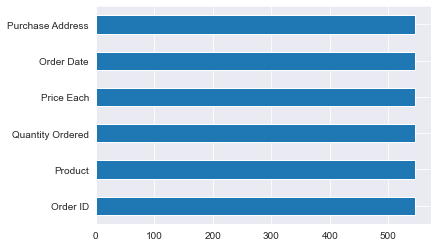

In [14]:
missing_values_df= all_df.isnull().sum().plot(kind='barh')

In [15]:
df_nan= all_df[all_df.isna().any(axis=1)]
df_nan.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


### 2. Dropping the Null values

In [16]:
all_df= all_df.dropna( how='all')
all_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### 3. Changing columns to lowercase and replacing spaces with underscores

In [17]:
all_df.columns= [x.lower() for x in all_df.columns]
all_df.columns= all_df.columns.str.replace(' ', '_')
all_df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [18]:
all_df.dtypes

order_id            object
product             object
quantity_ordered    object
price_each          object
order_date          object
purchase_address    object
dtype: object

# Augment data with additional Columns

### Creating month column

In [34]:
all_df['month']= all_df['order_date'].str[:2]
all_df['month']= all_df['month'].astype('int')

all_df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [38]:
all_df['month_name'] = pd.to_datetime(all_df['month'], format='%m').dt.month_name().str.slice(stop=3)
all_df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,month_name
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Apr
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Apr
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Apr
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Apr
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Apr


### Finding and deleting 'Or' in the month column

In [20]:
or_df = all_df[all_df['order_date'].str[:2] == 'Or']
or_df

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
...,...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [21]:
all_df= all_df[all_df['order_date'].str[:2]!= 'Or']

### Converting quantity ordered  to int and price each float

In [25]:
all_df= all_df.astype({'quantity_ordered': int, 'price_each': float})

### Creating a sales column

In [39]:
all_df['sales']= all_df['quantity_ordered'] * all_df['price_each']
all_df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,month_name
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Apr
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Apr
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Apr
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Apr
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Apr


#### Adding a city Column

In [47]:
all_df['city']= all_df['purchase_address'].apply(lambda x: x.split(',')[1])
all_df['state']= all_df['purchase_address'].apply(lambda x: x.split(',')[2].split(' ')[1])
all_df['city_state']=all_df['city'] + ' '  + '(' + all_df['state'] + ')'
all_df

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,month_name,city,state,city_state
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Apr,Dallas,TX,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Apr,Boston,MA,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Apr,Los Angeles,CA,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Apr,Los Angeles,CA,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Apr,Los Angeles,CA,Los Angeles (CA)
...,...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Sep,Los Angeles,CA,Los Angeles (CA)
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,Sep,San Francisco,CA,San Francisco (CA)
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,Sep,San Francisco,CA,San Francisco (CA)
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,Sep,San Francisco,CA,San Francisco (CA)


#### Adding an hour  and minute column

In [54]:
all_df['order_date']= pd.to_datetime(all_df['order_date']) 

all_df['hour']= all_df['order_date'].dt.hour

all_df['minute']= all_df['order_date'].dt.minute

In [55]:
all_df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,month_name,city,state,city_state,hour,minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Apr,Dallas,TX,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Apr,Boston,MA,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Apr,Los Angeles,CA,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Apr,Los Angeles,CA,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Apr,Los Angeles,CA,Los Angeles (CA),9,27


## Exploratory Analysis

### 1. What was the best Sales' month?

In [51]:
results= all_df.groupby('month_name').sum().sort_values(by='sales')
results

,quantity_ordered,price_each,month,sales
month_name,,,,
Jan,10903,1.811768e+06,9709,1.822257e+06
Sep,13109,2.084992e+06,104589,2.097560e+06
Feb,13449,2.188885e+06,23950,2.202022e+06
Aug,13448,2.230345e+06,95688,2.244468e+06
Jun,15253,2.562026e+06,81324,2.577802e+06
Jul,16072,2.632540e+06,100051,2.647776e+06
Mar,17005,2.791208e+06,45459,2.807100e+06
May,18667,3.135125e+06,82830,3.152607e+06
Nov,19798,3.180601e+06,193303,3.199603e+06


<ipython-input-52-4dea99196d55>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax= fig.add_subplot(111)


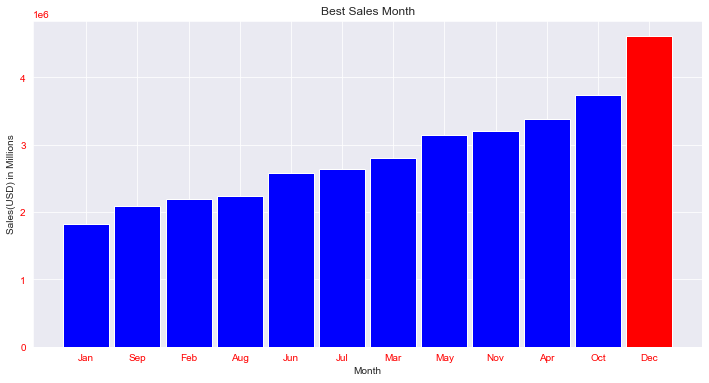

In [52]:
fig= plt.figure(figsize= (12, 6))

my_colors=['b','b','b','b','b','b','b','b','b','b','b','r']

plt.bar(results.index,results['sales'], color= my_colors, width= 0.9)

plt.xlabel('Month')
ax= fig.add_subplot(111)

ax.set_xticks(np.arange(len(results.index)))


plt.ylabel('Sales(USD) in Millions')


plt.title('Best Sales Month')
ax= plt.gca()

ax.tick_params(axis='x', colors='red')
ax.tick_params(axis='y', colors='red')
 
plt.show()

### 2. Highest Sales by city

In [49]:
results1 = all_df.groupby('city_state').sum().sort_values(by='sales')
results1

,quantity_ordered,price_each,month,sales
city_state,,,,
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
Seattle (WA),16553,2.733296e+06,104941,2.747755e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06


<ipython-input-50-2e8872194087>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax= fig.add_subplot(111)


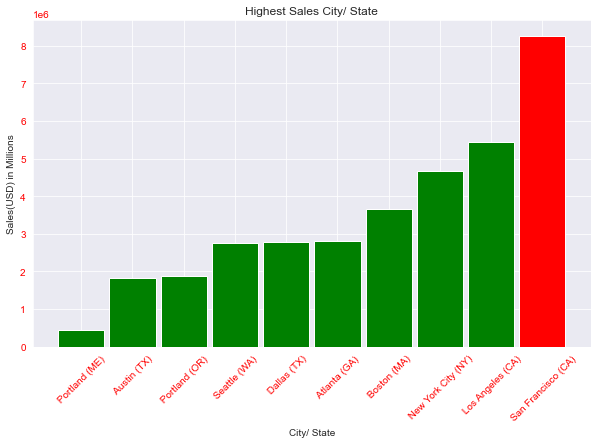

In [50]:
fig= plt.figure(figsize= (10, 6))

my_colors=['g','g','g','g','g','g','g','g','g','r']

plt.bar(results1.index,results1['sales'], color= my_colors, width= 0.9)

plt.xlabel('City/ State')
ax= fig.add_subplot(111)

ax.set_xticks(np.arange(len(results1.index)))


plt.ylabel('Sales(USD) in Millions')


plt.title('Highest Sales City/ State')
ax= plt.gca()

ax.tick_params(axis='x', colors='red')
ax.tick_params(axis='y', colors='red')
ax.set_xticklabels(results1.index, rotation = 45) 
plt.show()

### 3. What time of the day should Advertisements be displayed?

In [63]:
results2 = all_df.groupby('hour').count() 

results2

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,month_name,city,state,city_state,minute
hour,,,,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


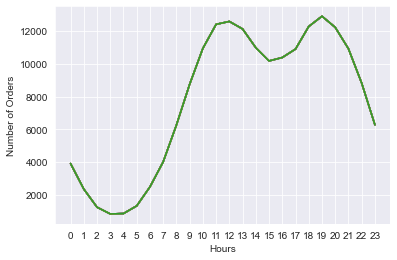

In [64]:
plt.plot(results2.index, results2)
plt.xticks(results2.index)
plt.ylabel('Number of Orders')
plt.xlabel('Hours')
plt.show()

### Recommendation: advertisements should be maximized around 11 am and/or 7pm (19 GMT)

### 4. What products are most often sold together?

In [74]:
dupl= all_df[all_df['order_id'].duplicated(keep=False)]
dupl.head()


,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,month_name,city,state,city_state,hour,minute
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Apr,Los Angeles,CA,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Apr,Los Angeles,CA,Los Angeles (CA),14,38
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Apr,Los Angeles,CA,Los Angeles (CA),19,42
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Apr,Los Angeles,CA,Los Angeles (CA),19,42
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Apr,Boston,MA,Boston (MA),11,31


In [75]:
dupl['group_items']= dupl.groupby('order_id')['product'].transform(lambda x: ','.join(x))
dupl.head()

<ipython-input-75-d7406a445d7e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dupl['group_items']= dupl.groupby('order_id')['product'].transform(lambda x: ','.join(x))


,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,month_name,city,state,city_state,hour,minute,group_items
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Apr,Los Angeles,CA,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Apr,Los Angeles,CA,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Apr,Los Angeles,CA,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Apr,Los Angeles,CA,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Apr,Boston,MA,Boston (MA),11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [77]:
dupl= dupl[['order_id', 'group_items']].drop_duplicates()

dupl.head()

,order_id,group_items
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [78]:
count= Counter()

for row in dupl['group_items']:
    row_list= row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### 5. What Product sold the most?

In [80]:
results3= all_df.groupby('product').sum().sort_values(by='quantity_ordered')
results3

,quantity_ordered,price_each,month,sales,hour,minute
product,,,,,,
LG Dryer,646,387600.00,4383,387600.00,9326,19043
LG Washing Machine,666,399600.00,4523,399600.00,9785,19462
Vareebadd Phone,2068,826000.00,14309,827200.00,29472,61835
20in Monitor,4129,451068.99,29336,454148.71,58764,122252
ThinkPad Laptop,4130,4127958.72,28950,4129958.70,59746,121508
Macbook Pro Laptop,4728,8030800.00,33548,8037600.00,68261,137574
Flatscreen TV,4819,1440000.00,34224,1445700.00,68815,142789
Google Phone,5532,3315000.00,38305,3319200.00,79479,162773
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076,183480


<ipython-input-81-f8840fea1487>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax= fig.add_subplot(111)


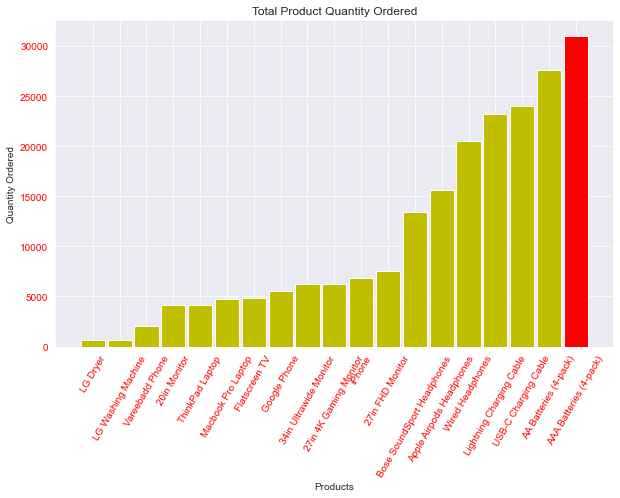

In [81]:
fig= plt.figure(figsize= (10, 6))

my_colors=['y','y','y','y','y','y','y','y','y','y', 'y','y', 'y', 'y', 'y','y', 'y', 'y', 'r']

plt.bar(results3.index,results3['quantity_ordered'], color= my_colors, width= 0.9)

plt.xlabel('Products')

plt.ylabel('Quantity Ordered')
ax= fig.add_subplot(111)

ax.set_xticks(np.arange(len(results3.index)))


plt.title('Total Product Quantity Ordered')
ax= plt.gca()

ax.tick_params(axis='x', colors='red')
ax.tick_params(axis='y', colors='red')
ax.set_xticklabels(results3.index, rotation = 60) 
plt.show()

### 6. Correlation to check if there is a releationship between price and quantity ordered

In [83]:
results4= all_df.groupby('product').mean()
results4.sort_values(by='quantity_ordered')
results4

,quantity_ordered,price_each,month,sales,hour,minute
product,,,,,,
20in Monitor,1.006828,109.99,7.153377,110.740968,14.329188,29.810290
27in 4K Gaming Monitor,1.002247,389.99,7.133226,390.866382,14.593258,29.587640
27in FHD Monitor,1.005728,149.99,7.001199,150.849141,14.325296,29.299054
34in Ultrawide Monitor,1.002912,379.99,7.005986,381.096588,14.411260,29.684517
AA Batteries (4-pack),1.343004,3.84,7.073820,5.157137,14.498809,29.598046
AAA Batteries (4-pack),1.502689,2.99,7.091226,4.493040,14.404922,29.655201
Apple Airpods Headphones,1.007203,150.00,7.040774,151.080455,14.361309,29.298990
Bose SoundSport Headphones,1.009906,99.99,7.062889,100.980520,14.442402,29.463640
Flatscreen TV,1.003958,300.00,7.130000,301.187500,14.336458,29.747708


<ipython-input-84-5731a4ee625a>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(results4.index, rotation = 'vertical', size= 10)


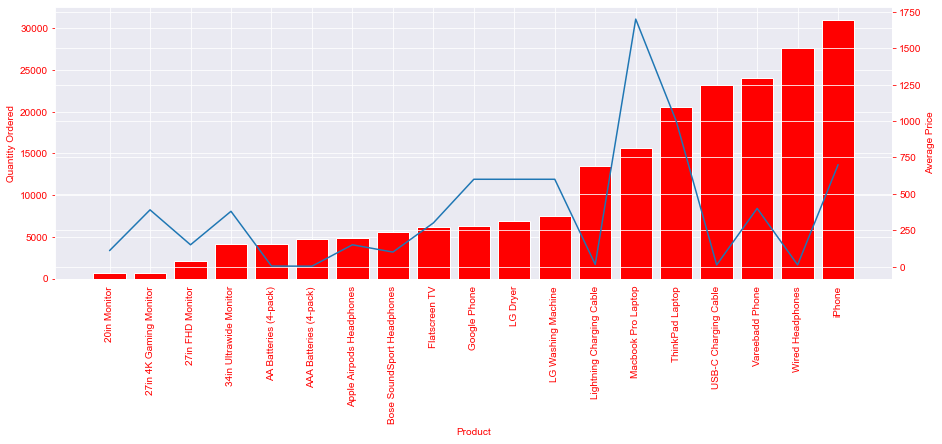

In [84]:
fig, ax1= plt.subplots(figsize=(15,5))
ax1= plt.gca()
ax2= ax1.twinx()

ax1.bar(results3.index,results3['quantity_ordered'], color= 'r')
ax2.plot(results4.index, results4['price_each'])

ax1.set_xlabel('Product', color='r')
ax1.set_ylabel('Quantity Ordered', color= 'r')

ax2.set_ylabel('Average Price', color='r')
ax1.tick_params(axis='x', colors='red')
ax1.tick_params(axis='y', colors='red')
ax2.tick_params(axis='x', colors='red')
ax2.tick_params(axis='y', colors='red')

ax1.set_xticklabels(results4.index, rotation = 'vertical', size= 10)
plt.show()